# A look ahead to ECG analysis

In [3]:
import numpy as np
import pandas as pd

# 1. On the kaggle
raw ECG data from https://www.kaggle.com/shayanfazeli/heartbeat#

In [19]:
url = "/Users/mac365.vn/Downloads/archive-2/mitbih_test.csv"
df = pd.read_csv(url, header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Each row is a beat
The data were collected with a frequency of 125Hz, which means 125 measurements in one second.  
I assume that y scale is 10mmVolt / 1 unit.  
The column `187` corresponded to its label.  
Classes: ['N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4]

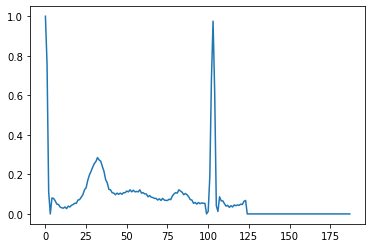

In [20]:
df.loc[0].plot()

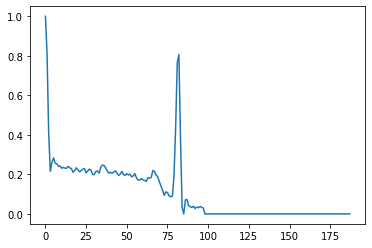

In [21]:
df.loc[125].plot()

### => This kind of data is favorable in deep-learning classification tasks. As this is raw data, so interpretability is low.

## 2. Let's make a reference range for ECG in pediatrics population.

The approach polynomial regression is done by [Chubb et. al](https://pubmed.ncbi.nlm.nih.gov/31846856/)

Now we wanna try the same thing with GAM approach.  
This can be done using pyGAM package https://pygam.readthedocs.io

The data should include the variables such as: 
1. Independant variables: `age`, `gender`, `race`, `is_calm`,...
2. Dependant variables: `P_height`, `P_length`, `PR_interval`, `QRS_interval`, `ST_interval`, `T_height`, `T_length`,..

Disadvantages: Because the wave is summed up to some values, some characteristics might be missed: the slope, the Q tick,... Labeling work is exhausting as well.

Advantages: We can use those variables in classification tasks, and interpretability is good, which is a must in medicine research.